In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import pathlib
from pprint import pprint

%matplotlib widget

P1.csv: contour length=445.47286904944576, end to end length=310.5886582233835
P10.csv: contour length=544.1858589794718, end to end length=229.6121793332752
P11.csv: contour length=620.7395583806403, end to end length=92.00752393746514
P12.csv: contour length=1314.7978211207924, end to end length=406.38904488159346
P13.csv: contour length=1597.5174647679567, end to end length=746.5895044564264
P14.csv: contour length=617.4831110086616, end to end length=398.6812471059056
P15.csv: contour length=356.37366492519544, end to end length=144.37984380766306
P16.csv: contour length=657.4154836923949, end to end length=245.658511621287
P17.csv: contour length=184.32216357235484, end to end length=111.38769871982508
P18.csv: contour length=731.1317690638917, end to end length=123.26275382354605
P19.csv: contour length=749.592468104602, end to end length=318.11950408106725
P2.csv: contour length=1191.9466730043036, end to end length=613.570971072122
P20.csv: contour length=660.8123384032776, end

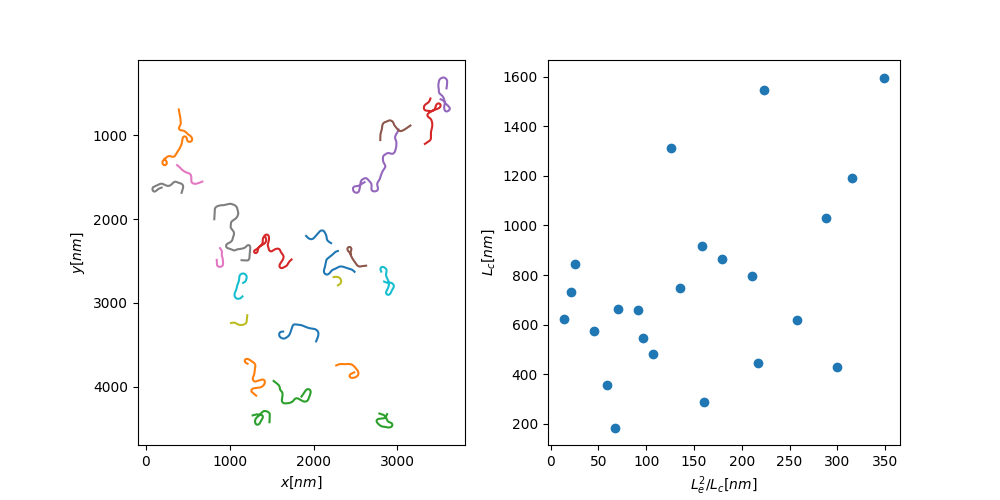

In [13]:

def contour_length(xvals: np.ndarray, yvals: np.ndarray):
    xdiffs = xvals[1:] - xvals[:-1]
    ydiffs = yvals[1:] - yvals[:-1]
    return np.sum(np.sqrt(xdiffs**2 + ydiffs**2))

def e2e_length(xvals: np.ndarray, yvals: np.ndarray):
    xdiff = xvals[0]-xvals[-1]
    ydiff = yvals[0]-yvals[-1]
    return np.sqrt(xdiff**2 + ydiff**2)

def task_1():
    curdir = pathlib.Path(os.getcwd()) / "traj"
    conversion_rate = 0.3255 # pix/nm
    fig, (ax, ax1) = plt.subplots(1, 2, figsize=(2*5, 1*5))
    ax.set_xlabel("$x [nm]$")
    ax.set_ylabel("$y [nm]$")
    ax.set_aspect('equal', adjustable='box')
    ax.invert_yaxis()
    ax1.set_xlabel("$L_e^2/L_c [nm]$")
    ax1.set_ylabel("$L_c [nm]$")
    clens, e2elens = [], []
    for file in os.listdir(curdir):
        df = pd.read_csv(curdir / file, header=None) # pix
        df /= conversion_rate # nm
        ax.plot(df[0], df[1], label=file)
        clen = contour_length(np.array(df[0]), np.array(df[1]))
        e2elen = e2e_length(np.array(df[0]), np.array(df[1]))
        print(f"{file}: contour length={clen}, end to end length={e2elen}")
        clens.append(clen)
        e2elens.append(e2elen)
    clens, e2elens = np.array(clens), np.array(e2elens)
    ax1.scatter(e2elens**2/clens, clens)
    plt.show()

task_1()

## Notes

### 1b) 

Units along axis??

### 1d)

Don't see any correlation